<a href="https://colab.research.google.com/github/najimamuhammad/Programs/blob/main/pytirch_mnistFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [4]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.62MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.64MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [5]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=10
    ,shuffle=True
)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [7]:
sample = next(iter(train_set))

len(sample)

2

In [8]:
image, label = sample

label: 9


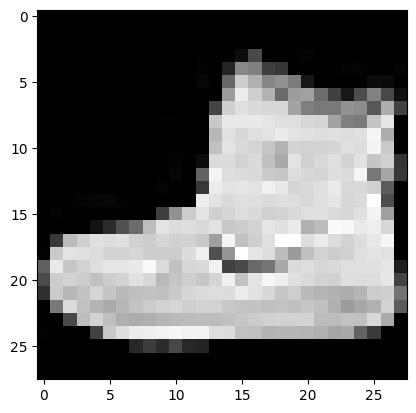

In [11]:
plt.imshow(image.squeeze(), cmap='gray')

print('label:', label)

In [13]:
batch = next(iter(train_loader))

images, labels = batch

labels: tensor([6, 7, 4, 9, 4, 0, 7, 1, 0, 9])


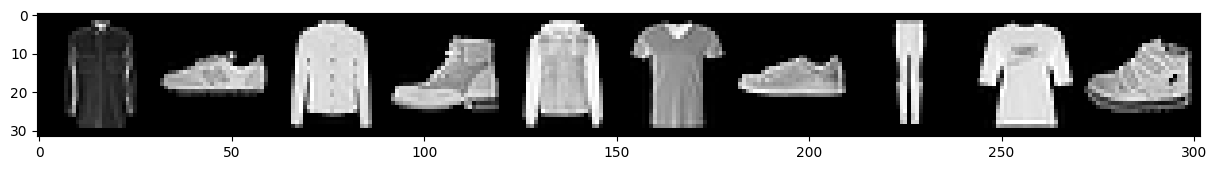

In [14]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [17]:
import torch.nn as nn
import torch.optim as optim

In [16]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t

In [20]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [21]:
network = Network()
optimizer = optim.Adam(network.parameters(), lr=0.01)
train_loader = torch.utils.data.DataLoader(
    train_set
    ,batch_size=100
    ,shuffle=True
)
for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch,
        "total_correct:", total_correct,
        "loss:", total_loss
    )

epoch 0 total_correct: 46705 loss: 349.7031874805689
epoch 1 total_correct: 50971 loss: 243.66267690062523
epoch 2 total_correct: 51537 loss: 227.06187848746777
epoch 3 total_correct: 51959 loss: 216.42860999703407
epoch 4 total_correct: 52357 loss: 208.1410170197487
epoch 5 total_correct: 52396 loss: 204.66299384832382
epoch 6 total_correct: 52553 loss: 201.68669191002846
epoch 7 total_correct: 52623 loss: 196.88837073743343
epoch 8 total_correct: 52656 loss: 196.95173735171556
epoch 9 total_correct: 52836 loss: 193.42466086894274


In [2]:
(52836/60000)*100


88.06